 Installing Dependencies

In [ ]:
pip install tensorflow-gpu

In [ ]:
 import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import pandas as pd

Downloading the dataset

In [ ]:
 !wget "https://github.com/datasigntist/datasetsForTraining/raw/master/songlyrics.zip"

--2020-07-24 15:54:45--  https://github.com/datasigntist/datasetsForTraining/raw/master/songlyrics.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/datasigntist/datasetsForTraining/master/songlyrics.zip [following]
--2020-07-24 15:54:46--  https://raw.githubusercontent.com/datasigntist/datasetsForTraining/master/songlyrics.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21988108 (21M) [application/zip]
Saving to: ‘songlyrics.zip.1’

songlyrics.zip.1    100%[===================>]  20.97M  30.0MB/s    in 0.7s    

2020-07-24 15:54:47 (30.0 MB/s) - ‘songlyrics.zip.1’ saved [21988108/21988108]



In [ ]:
!unzip /content/songlyrics.zip

Archive:  /content/songlyrics.zip
replace songdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: songdata.csv            


Artist Name

In [ ]:
artistName = input ("Enter the artist Name : ")
artistName = str(artistName)

Enter the artist Name : ABBA


Loading the Dataset

In [ ]:
songdata=pd.read_csv("/content/songdata.csv")

In [ ]:
songdata.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
songdata.drop(["link"],axis=1,inplace=True)

In [ ]:
songdata.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


Filtering the songs according to artist name

In [ ]:
songByArtist=songdata[songdata["artist"] == artistName]

In [ ]:
songByArtist.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [ ]:
#no of songs by artist
print("Total no.of songs by ", artistName,": ",songByArtist.shape[0])

Total no.of songs by  ABBA :  113


Joining all the text into one list

In [ ]:
databyArtist="\n".join(songByArtist["text"])

In [ ]:
#lowering all the text and naming to corpus variable
Corpus=databyArtist.lower().split("\n")

In [ ]:
len(Corpus)

5147

In [ ]:
Corpus[0:10]

["look at her face, it's a wonderful face  ",
 'and it means something special to me  ',
 'look at the way that she smiles when she sees me  ',
 'how lucky can one fellow be?  ',
 '  ',
 "she's just my kind of girl, she makes me feel fine  ",
 'who could ever believe that she could be mine?  ',
 "she's just my kind of girl, without her i'm blue  ",
 'and if she ever leaves me what could i do, what could i do?  ',
 '  ']

Removing useless characters
 
 *Get rid of words like [chorus:] that do not mean anything
  

*Strip the empty sapces, remove any empty lines and get rid of specical characters like "(" , ")" , "", "/" , ".", ",",":"

In [ ]:
stopWords = ["(",")","/","\\",".",",",":",'"']
wordsTobeRemoved = ["[chorus:]"]

In [ ]:
 for loop in range(len(wordsTobeRemoved)):
  Corpus = [line.replace(wordsTobeRemoved[loop],"") for line in Corpus]

In [ ]:
len(Corpus)

5147

In [ ]:
 for loop in range(len(stopWords)):
  print(stopWords[loop])
  Corpus = [line.replace(stopWords[loop],"") for line in Corpus]

(
)
/
\
.
,
:
"


In [ ]:
#removing white spaces
 
Corpus = [elem.strip() for elem in Corpus if elem.strip()!=""]

In [ ]:
print("Total No of linea after Cleaning:",len(Corpus))

Total No of linea after Cleaning: 4331


TOKENIZING

In [ ]:
tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(Corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
 # Reverse the word index
reverseWordIndex = {v: k for k, v in tokenizer.word_index.items()}

 N-gram Sequence

In [ ]:
input_sequences = []
for line in Corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

 Padding the Sequence to maximum length

In [ ]:
max_len_sequence = max([len(x) for x in input_sequences])

In [ ]:
 print("Maximum length of sequence is ", max_len_sequence)

Maximum length of sequence is  20


In [ ]:
 input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_len_sequence,padding="pre"))

 Defining the input and the labels

In [ ]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

 Converting the labels to one hot encoding

In [ ]:
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [ ]:
np.argmax(ys[0])
print(ys[0][309])

0.0


 Building the model

In [ ]:
embeddingSize = 500
nodeCount = 150

In [ ]:
model = Sequential()
model.add(Embedding(total_words, embeddingSize, input_length=max_len_sequence-1))
model.add(Bidirectional(LSTM(nodeCount, return_sequences = True)))
model.add(Bidirectional(LSTM(nodeCount, return_sequences = True)))
model.add(LSTM(nodeCount))
model.add(Dense(total_words, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 19, 500)           1171500   
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 300)           781200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 19, 300)           541200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               270600    
_________________________________________________________________
dense (Dense)                (None, 2343)              353793    
_________________________________________________________________
dense_1 (Dense)              (None, 2343)              5491992   
Total params: 8,610,285
Trainable params: 8,610,285
Non-trainable params: 0
______________________________________________

 Embedding Analysis

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
word_index = tokenizer.word_index

(2343, 500)


In [ ]:
happy_key = word_index["happy"]
happy_word = reverseWordIndex[happy_key]
print("Key for Happy is :", happy_key)
happy_embeddings = weights[happy_key]
print('Embeddings for Happy is :-->\n', happy_embeddings.shape)

Key for Happy is : 154
Embeddings for Happy is :-->
 (500,)


In [ ]:
glad_key = word_index["glad"]
glad_word = reverseWordIndex[glad_key]
print("Key for Glad is :", glad_key)
glad_embeddings = weights[glad_key]
print('Embeddings for Glad is :-->\n', glad_embeddings.shape)

Key for Glad is : 396
Embeddings for Glad is :-->
 (500,)


In [ ]:
sad_key = word_index["sad"]
sad_word = reverseWordIndex[sad_key]
print("Key for sad is :", sad_key)
sad_embeddings = weights[sad_key]
print('Embeddings for sad is :-->\n', sad_embeddings.shape)

Key for sad is : 277
Embeddings for sad is :-->
 (500,)


 Training and Testing

In [ ]:
#use 100 epochs for better performance

In [ ]:
history = model.fit(xs, ys, epochs=20, verbose=1)

Epoch 1/20
763/763 [==============================] - 47s 61ms/step - loss: 6.0582 - accuracy: 0.0438
Epoch 2/20
763/763 [==============================] - 47s 61ms/step - loss: 5.5208 - accuracy: 0.0692
Epoch 3/20
763/763 [==============================] - 47s 61ms/step - loss: 5.2514 - accuracy: 0.0907
Epoch 4/20
763/763 [==============================] - 47s 61ms/step - loss: 5.0256 - accuracy: 0.1075
Epoch 5/20
763/763 [==============================] - 47s 61ms/step - loss: 4.8099 - accuracy: 0.1257
Epoch 6/20
763/763 [==============================] - 47s 61ms/step - loss: 4.6173 - accuracy: 0.1408
Epoch 7/20
763/763 [==============================] - 47s 61ms/step - loss: 4.4328 - accuracy: 0.1564
Epoch 8/20
763/763 [==============================] - 47s 61ms/step - loss: 4.2370 - accuracy: 0.1762
Epoch 9/20
763/763 [==============================] - 47s 61ms/step - loss: 4.0229 - accuracy: 0.1989
Epoch 10/20
763/763 [==============================] - 47s 61ms/step - loss: 3.793

In [ ]:
 import matplotlib.pyplot as plt
 
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

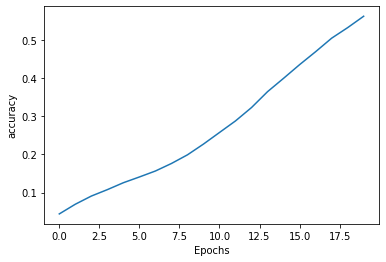

In [ ]:
plot_graphs(history,'accuracy')

 Predict using the trained model

In [ ]:
songByArtist = songByArtist.reset_index()

In [ ]:
minLengthOfASong = int(np.min([len(songByArtist["text"][key].split("\n")) for key in range(songByArtist.shape[0])]))
print("Min Length of a Song :",minLengthOfASong,' lines')

Min Length of a Song : 14  lines


In [ ]:
allSongDataByArtist = [songByArtist["text"][key].split("\n") for key in range(songByArtist.shape[0])]

In [ ]:
wordsByLines = []
for loop1 in range(len(allSongDataByArtist)):
  for loop2 in range(minLengthOfASong):
    if (loop1 == 0):
      wordsByLines.append(len([elem.strip() for elem in allSongDataByArtist[loop1][loop2].split(" ") if elem.strip()!=""]))
    else:
      wordsByLines[loop2] = (wordsByLines[loop2]+len([elem.strip() for elem in allSongDataByArtist[loop1][loop2].split(" ") if elem.strip()!=""]))/2
wordsInTotal = int(sum(wordsByLines))
print("Average number of words per song :",wordsInTotal)

Average number of words per song : 85


In [ ]:
seed_text = "We loved"
next_words = wordsInTotal
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_len_sequence-1, padding='pre')
    predicted = (model.predict_classes(token_list, verbose=0))
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

We loved me cry and now i have to say place and now i can't would hear it may did i think i could hear it tight it ah ha ha ah ha ah ha ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah ha ah


In [ ]:
newSong = [elem for elem in seed_text.split(" ")]

In [ ]:
wordsByLines = [int(elem) for elem in wordsByLines]

In [ ]:
startPos = 0
endPos = 0
for loop in range(len(wordsByLines)):
  endPos = endPos + wordsByLines[loop]
  print(' '.join(elem for elem in newSong[startPos:endPos]))
  startPos = endPos

We loved me cry and now i have
to say place and now i
can't would hear it may did i
think i could hear it tight it
ah ha ha
ah ha ah ha ha ah ha ah
ha ah ha ah ha ah
ha ah ha ah ha
ah ha ah ha
ah ha ah
ha ah ha ah ha
ah ha ah ha ah
ha ah ha ah ha ah
ha ah ha ah
